In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import csv
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [2]:
with open('../data/twitter_stars.csv', 'r',  encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    columns = list(zip(*reader))
stars = {c[0] : c[1:] for c in columns}
for key in stars.keys():
    stars[key] = [int(n) for n in stars[key]]
likes = [favs + rts for favs, rts in zip(stars['favs'], stars['rts'])]
print(likes)

[6, 31, 10, 10, 6, 46, 10, 4, 9, 115, 6, 7, 7, 8, 8, 4, 24, 6, 3, 14, 8, 26, 20, 12, 3, 9, 4, 15, 28, 32, 42, 12, 10, 13, 19, 28, 5, 3, 10, 11, 5, 18, 1, 2, 5, 4, 4, 6, 7, 13, 13, 23, 10, 9, 14, 5, 6, 8, 14, 2, 22, 4, 5, 8, 4, 16, 2, 3, 10, 5, 10, 10, 1, 10, 2, 6, 1, 2, 7, 1, 1, 0, 2, 4, 1, 0, 0, 1]


### Plotly

In [3]:
hist_data = np.histogram(likes, bins = 30)
binsize = hist_data[1][1] - hist_data[1][0]

In [12]:
hist_data[1][-1]

115.0

In [13]:
trace = go.Histogram(
            x=likes,
            autobinx=False,
            xbins=dict(
                start=hist_data[1][0],
                end=hist_data[1][-1]+1,
                size=binsize
           )
        )

In [14]:
data = [trace] 

In [15]:
layout = go.Layout(
    bargroupgap=0.01
)

In [16]:
fig = go.Figure(data=data, layout=layout)

In [17]:
py.iplot(fig)

### Matplotlib

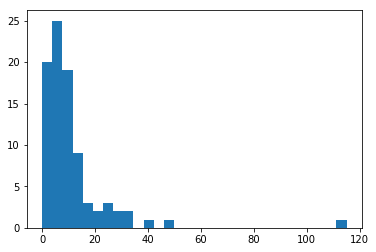

In [9]:
plt.hist(likes, bins=30)
plt.show()

### Bokeh

In [10]:
output_notebook()

Loading BokehJS ...

In [11]:
hist, edges = np.histogram(likes, bins = 30)
plot = figure(plot_height=400, plot_width=400, title="histogram of @python_tip stars",
              tools="crosshair,pan,reset,save,wheel_zoom,hover")

hh = plot.quad(bottom=0, left=edges[:-1], right=edges[1:], top=hist, fill_color="#446785", line_color="#033649")
show(plot)